In [1]:
from src.data import *
from src.models import *
import torch.optim as optim
from src.trainer import *
from torch.utils.data import DataLoader
import time
st = time.time()
TrainDataset = KoDataset("/home/jack/torchstudy/05May/ELMo/data/new_cleaned_petition.ko", 
            max_character_length = 5,
            max_character_size = 2000,
            max_vocab_size = 30000
            )

print(f"1. Finish TrainDataset({time.time()-st:.3f}s)")


model_config = {
    "character_embedding" :128,
    'cnn_kernal_output' : [[2, 256], [3, 256]],
    "word_embedding" : 512,
    "character_set_size" : len(TrainDataset.character_dict),
    'highway_layer' : 2,
    "hidden_size" : 1024,
    "output_dim" : len(TrainDataset.ko_vocab)
}

train_config = {
    "epochs" : 100,
    "device" : "cuda:0",
    "batch_size" : 64,
    "lr" : 1,
    "optimizer" : torch.optim.Adadelta,
    "schedule" : False
}


1. Finish TrainDataset(16.134s)


In [3]:
len(TrainDataset.character_dict)

1387

In [9]:
TrainDataset = KoDataset("/home/jack/torchstudy/05May/ELMo/data/new_cleaned_petition.ko", 
            max_character_length = 5,
            max_character_size = 2000,
            max_vocab_size = 100000
            )

In [10]:
len(TrainDataset.ko_vocab)

53385

In [1]:
import torch

In [16]:
a = torch.randn(1,128,3)

In [8]:
a

tensor([[[ 0.0677, -1.1234, -0.5093],
         [ 0.2759,  1.2056,  0.3783],
         [ 1.8241,  0.0512, -0.9374]]])

In [15]:
torch.max(a, dim=-1)

torch.return_types.max(
values=tensor([[0.0677, 1.2056, 1.8241]]),
indices=tensor([[0, 1, 0]]))

In [17]:
torch.max(a.permute(0,2,1), dim = -1)[0]

tensor([[2.6768, 2.8562, 3.1290]])

In [19]:
import torch

In [74]:
a = torch.randn(5,5,3)

In [75]:
ln = torch.nn.LayerNorm([3])

In [76]:
ln(a).shape

torch.Size([5, 5, 3])

In [72]:
b = torch.randn(10,3).reshape(-1)
b

tensor([-1.2091, -0.2566,  0.2319, -0.6538,  0.7714, -0.9115, -0.2257, -0.0461,
         0.0659, -1.0287, -0.3384,  0.9189,  0.1855,  0.1463,  1.1862, -0.9253,
        -0.5159,  0.1947,  0.6072, -0.4259,  0.0760, -1.4922,  0.8150,  0.8129,
        -0.0440, -1.0061,  0.3962,  2.2259, -0.6984, -0.2854])

In [73]:
torch.flip(b, dims = [0])

tensor([-0.2854, -0.6984,  2.2259,  0.3962, -1.0061, -0.0440,  0.8129,  0.8150,
        -1.4922,  0.0760, -0.4259,  0.6072,  0.1947, -0.5159, -0.9253,  1.1862,
         0.1463,  0.1855,  0.9189, -0.3384, -1.0287,  0.0659, -0.0461, -0.2257,
        -0.9115,  0.7714, -0.6538,  0.2319, -0.2566, -1.2091])

## Test

In [1]:
import torch
import dill
from konlpy.tag import Mecab

In [2]:
def read_pkl(path):
    with open(path, "rb") as f:
        return dill.load(f)

In [3]:
def make_test_sample(traindataset, raw_ko_list):
    batch = []
    for raw_ko in raw_ko_list:
        sample = torch.tensor([2]+[traindataset.ko_vocab.vocab_dict[token] for token in traindataset.ko_vocab.tokenizer(raw_ko)]+[3]).long()
        batch.append(sample)
    return traindataset.collate_fn(batch)

In [23]:
!ls vocab

namu_traindataset_0529.pkl  namu_traindataset.pkl  traindataset_head.pkl  w2v
namu_traindataset_1.pkl     petition_ynat.pkl	   traindataset.pkl


In [24]:
!ls model/

best_model_0521_4.pt	  best_model_11.pt	 elmo_with_w2v30.pt
best_model_0521_5.pt	  best_model_1.pt	 only_w2v_init10.pt
best_model_0524_256_4.pt  best_model_under.pt	 only_w2v_init20.pt
best_model_0524_256_5.pt  best_namu_0527_256.pt  petition_ynat_0531.pt
best_model_0524_256_6.pt  elmo_without_w2v10.pt  random_emb_init10.pt
best_model_0524_256_7.pt  elmo_without_w2v20.pt  random_emb_init20.pt
best_model_0524_256_8.pt  elmo_with_random10.pt  test
best_model_0524_256.pt	  elmo_with_random20.pt  tmp.pt
best_model_0.pt		  elmo_with_w2v10.pt	 ynat
best_model_10.pt	  elmo_with_w2v20.pt


In [25]:
train_strings = [i.strip() for cnt, i in enumerate(open("./data/new_cleaned_petition.ko.patch1").readlines()) if cnt < 10]

traindataset = read_pkl("./vocab/namu_traindataset.pkl")
model = torch.load("./model/best_namu_0527_256.pt", map_location="cpu")
sentence, char = make_test_sample(traindataset, train_strings)
print([traindataset.ko_vocab.index_dict[int(i)] for i in sentence[0]])

['<SOS>', '국민', '과', '소통', '하', '시', '고', '자유', '롭', '고', '행복', '한', '나라', '를', '만들', '기', '위해', '힘쓰', '고', '계신', '대통령', '께', '존경', '과', '찬사', '를', '<UNK>', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']


In [26]:
train_strings

['국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다',
 '저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다',
 '저는 8기의 원전이 가동 건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다',
 '간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다',
 '울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오. 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다',
 '경상북도 동해안 최북단 울진군은 예부터 산과 바다',
 '계곡의 울창함이 보배처럼 아름답다하여 울진 이라는 지명을 간직하게 된 곳입니다',
 '이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면',
 '먼저 북면 부구리 지역에 원전 6기가 건설되었습니다',
 '해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다']

In [27]:
def get_predictions(model, input_batch):
    model.eval()
    fpred, bpred = model(input_batch)
    fpred = torch.argmax(fpred, dim=-1)
    bpred = torch.argmax(bpred, dim=-1)
    return fpred, bpred

In [28]:
fpred, bpred = get_predictions(model, char.to('cpu'))

In [30]:
for each in bpred.T:
    print(" ".join(traindataset.ko_vocab.index_dict[int(i)] for i in each))

국민 과 소통 하 시 고 자유 롭 고 행복 한 나라 를 만들 기 위해 힘쓰 고 계신 대통령 <UNK> 존경 과 찬사 를 <UNK> <EOS> <EOS> 다 었 싶 싶 싶 싶 싶 <UNK> <UNK> <UNK> <UNK> <UNK> 싶 싶 <UNK> <UNK> 싶 <UNK> <UNK> 싶 싶 <UNK> 싫 몫
저 는 경북 울진군 북면 부 <UNK> 성 로 12 번지 에 살 고 있 는 북면 발전 협의 회장 <UNK> 이 라고 합니다 <EOS> <EOS> 다 싶 1997 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 탓 싫 했
저 는 8 기 의 원전 이 가동 건설 되 고 있 는 이곳 북면 에 태어나 68 년 째 거주 하 고 있 는 원전 지역 주민 입니다 <EOS> <EOS> 다 1996 2016 싶 1997 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 탓 싫 몫
간절 한 마음 을 담 아 대통령 <UNK> 다음 과 같이 호소 드립니다 <EOS> <EOS> 다 었 1997 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 탓 싫 몫
울진 군민 과 약속 한 신 한울 3 , 4 호기 원전 건설 을 재개 해 주 십시오 <UNK> 여태껏 단 한 번 도 원전 건설 을 원한 적 없 는 제 가 신 한울 3 , 4 호기 원전 건설 을 청하 는 까닭 을 말씀 드리 겠 습니다 <EOS> <EOS>
경상북도 동해안 최북단 울진군 은 예 부터 산 과 바다 <EOS> <EOS> 다 었 1997 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 했
계곡 의 <UNK> 함 이 보배 처럼 아름답 다 하 여 울진 이 라는 지명 을 간직 하 게 된 곳 입니다 <EOS> <EOS> 다 었 1997 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싶 싫 했
이러 한 곳 에 1981 년 원전 사업 의 시작 으로 

In [31]:
for each in fpred.T:
    print(" ".join(traindataset.ko_vocab.index_dict[int(i)] for i in each))

국민 과 소통 하 시 고 자유 롭 고 행복 한 나라 를 만들 기 위해 힘쓰 고 계신 대통령 <UNK> 존경 과 찬사 를 <UNK> <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 제
저 는 경북 울진군 북면 부 <UNK> 성 로 12 번지 에 살 고 있 는 북면 발전 협의 회장 <UNK> 이 라고 합니다 <EOS> <EOS> 비 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등
저 는 8 기 의 원전 이 가동 건설 되 고 있 는 이곳 북면 에 태어나 68 년 째 거주 하 고 있 는 원전 지역 주민 입니다 <EOS> <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등
간절 한 마음 을 담 아 대통령 <UNK> 다음 과 같이 호소 드립니다 <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등
울진 군민 과 약속 한 신 한울 3 , 4 호기 원전 건설 을 재개 해 주 십시오 <UNK> 여태껏 단 한 번 도 원전 건설 을 원한 적 없 는 제 가 신 한울 3 , 4 호기 원전 건설 을 청하 는 까닭 을 말씀 드리 겠 습니다 <EOS> <EOS>
경상북도 동해안 최북단 울진군 은 예 부터 산 과 바다 <EOS> <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등
계곡 의 <UNK> 함 이 보배 처럼 아름답 다 하 여 울진 이 라는 지명 을 간직 하 게 된 곳 입니다 <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등 등
이러 한 곳 에 1981 년 원전 사업 의 시작 으로 울진군 에 북면 <EOS> <EOS> <EOS> 등 등 등 등 등 등 등 등 등 등 등 등 등 

## Transfer

In [10]:
def get_hiddens(model, input_batch, nlayers=2):
    model.eval()
    hiddens = []
    embs = []
    steps = input_batch.size()[1]
    for i in range(steps):
        each_input = input_batch[:,i,:].unsqueeze(1)
        x = model.embedding(each_input) # embedding & highway
        x = x.permute(1, 0, 2)
        output, (hidden, c_state) = model.rnn(x)
        embs.append(x)
        hiddens.append(hidden)
    embs = torch.stack(embs)
    embs = embs.permute(2, 0, 1, 3)
    hiddens = torch.stack(hiddens)
    hiddens = hiddens.permute(2, 0, 1, 3)

    fhiddens, bhiddens = hiddens[:,:,:nlayers,:], hiddens[:,:,nlayers:,:]
    s_lstm_hiddens = torch.cat([fhiddens, bhiddens], dim=3)
    s_embs = torch.cat([embs, embs], dim = 3)
    ret = torch.cat([s_embs, s_lstm_hiddens], dim=2)
    return ret

In [25]:
import torch.nn as nn

class task_fine_tune(nn.Module):
    def __init__(self, concat_dim, n_layers = 3, projection = 512, device = 'cuda:1'):
        super(task_fine_tune, self).__init__() 
        self.device = device
        self.task_gamma = torch.Tensor([0.01])
        self.task_tensor = torch.Tensor([1.] * n_layers)
        self.softmax = nn.Softmax(dim=0)
        self.projection = False
        if projection is not None:
            self.projection = True
            self.fc = nn.Linear(concat_dim, projection)
    def forward(self, input):
        input = input.to(self.device)
        task_s = self.softmax(self.task_tensor.to(self.device))
        task_vectors = torch.einsum('t,bsle->bse', task_s, input)
        task_vectors = torch.einsum('g,bse->bse', self.task_gamma.to(self.device), task_vectors)
        if self.projection:
            task_vectors = self.fc(task_vectors)
        task_vectors = task_vectors.permute(1, 0, 2)
        return task_vectors

In [26]:
hiddens = get_hiddens(model, char.to("cuda:1"))

In [27]:
t1 = task_fine_tune(concat_dim=1024).to('cuda:1')
task_vectors = t1(hiddens)

In [28]:
task_vectors.shape

torch.Size([52, 10, 512])

In [126]:
torch.einsum('t,bsle->bste', task.to('cuda:1'), hiddens)[:,:,0,0]

tensor([[127.9204, 127.4638, 127.9955, 128.7530, 125.8739, 125.4140],
        [127.9204, 128.4269, 128.4149, 109.5642, 128.6992, 125.8739]],
       device='cuda:1', grad_fn=<SelectBackward>)

In [38]:
get_hiddens(model, char.to("cuda:1"))[0].shape

torch.Size([1, 2, 256])

In [118]:
embs, hiddens = get_hiddens(model, char.to("cuda:1"))

In [158]:
task=t1(hiddens)

tensor([-0.7466])


In [93]:
embs.shape

torch.Size([2, 6, 1, 512])

In [94]:
hiddens.shape

torch.Size([2, 6, 2, 1024])

In [88]:
torch.cat([f,b],dim = 3).shape

torch.Size([2, 6, 2, 1024])

In [125]:
hiddens[:,:,0,0]

tensor([[382.2381, 380.8681, 382.4633, 384.7359, 376.0986, 374.7188],
        [382.2381, 383.7574, 383.7214, 327.1694, 384.5745, 376.0986]],
       device='cuda:1', grad_fn=<SelectBackward>)

In [80]:
get_hiddens(model, char.to("cuda:1"))[2]

torch.Size([2, 6, 2, 512])

In [52]:
del char

torch.Size([6, 2, 1024])

## Transfer learning Test

In [1]:
import glob
logfiles = glob.glob("downstream.log.*")

In [2]:
logfiles

['downstream.log.onlyw2v',
 'downstream.log.elmo_randw2v',
 'downstream.log.randominit',
 'downstream.log.onlyelmo',
 'downstream.log.elmow2v']

In [3]:
def file_read_and_parse(file_path):
    dims = {"onlyelmo" : ["ELMo","512"], 
            "elmo_randw2v" : ["ELMo+W2V(rand)","712"],
            "elmow2v" : ["ELMo+W2V(pretrained)","712"], 
            "onlyw2v" : ["W2V(pretrained)","200"], 
            "randominit" : ["W2V(rand)","200"]
           }
    ret = []
    mtype = file_path.split(".")[-1]
    with open(file_path, "r") as f:
        f.readline()
        for i, line in enumerate(f.readlines()):
            line = line.strip().split(",")
            train_loss = float(line[0].split(" : ")[1])
            valid_loss = float(line[1].split(" : ")[1])
            epoch_per_time = float(line[2].split(" : ")[1][:-1])
            ret.append([f"{'_'.join(dims[mtype])}", i, train_loss, valid_loss, epoch_per_time])
    return ret

In [4]:
df = []
for i in logfiles:
    df += file_read_and_parse(i)
import pandas as pd
df = pd.DataFrame(df, columns = ['model_type', 'epoch', 'train_loss','valid_loss', 'time'])
df = df.sort_values(by = 'model_type')

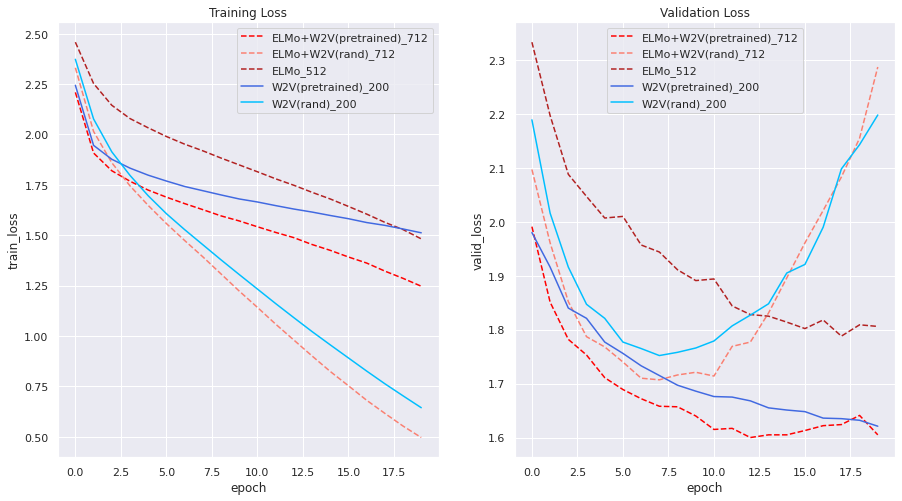

In [11]:
# onlyelmo -> elmo embedding (256 + 256)
# elmo_randw2v -> elmo + w2v (256 + 256 + 200)
# elmow2v -> elmo + w2v (256 + 256 + 200)
# onlyw2v -> w2v (200)
# randominit -> random embedding (200)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.lineplot(x="epoch", y="train_loss", hue="model_type", markers=True, data=df,ax=axes[0]).set_title('Training Loss')
sns.lineplot(x="epoch", y="valid_loss", hue="model_type", markers=True, data=df,ax=axes[1]).set_title('Validation Loss')

axes[0].lines[0].set_linestyle("--")
axes[0].lines[1].set_linestyle("--")
axes[0].lines[2].set_linestyle("--")
axes[0].lines[0].set_color("red")
axes[0].lines[1].set_color("salmon")
axes[0].lines[2].set_color("firebrick")
axes[0].lines[3].set_color("royalblue")
axes[0].lines[4].set_color("deepskyblue")


leg = axes[0].legend()
leg_lines = leg.get_lines()
leg_lines[0].set_linestyle("--")
leg_lines[1].set_linestyle("--")
leg_lines[2].set_linestyle("--")
leg_lines[0].set_color("red")
leg_lines[1].set_color("salmon")
leg_lines[2].set_color("firebrick")
leg_lines[3].set_color("royalblue")
leg_lines[4].set_color("deepskyblue")

axes[1].lines[0].set_linestyle("--")
axes[1].lines[1].set_linestyle("--")
axes[1].lines[2].set_linestyle("--")

axes[1].lines[0].set_color("red")
axes[1].lines[1].set_color("salmon")
axes[1].lines[2].set_color("firebrick")
axes[1].lines[3].set_color("royalblue")
axes[1].lines[4].set_color("deepskyblue")

leg = axes[1].legend()
leg_lines = leg.get_lines()
leg_lines[0].set_linestyle("--")
leg_lines[1].set_linestyle("--")
leg_lines[2].set_linestyle("--")
leg_lines[0].set_color("red")
leg_lines[1].set_color("salmon")
leg_lines[2].set_color("firebrick")
leg_lines[3].set_color("royalblue")
leg_lines[4].set_color("deepskyblue")


<AxesSubplot:xlabel='model_type', ylabel='time'>

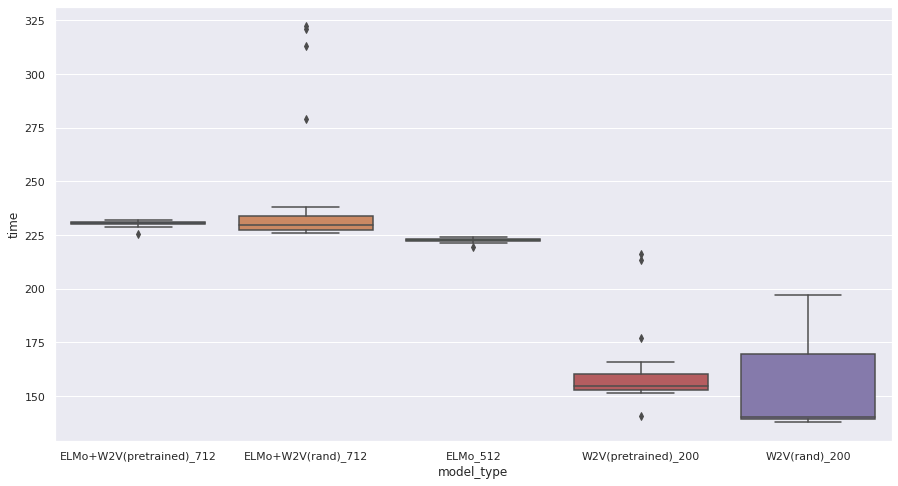

In [6]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x='model_type', y='time', data=df)

In [27]:
validation_files = glob.glob("./eval/val/*19.txt")

In [28]:
def (file_path):
    tot = 0
    hit = 0
    with open(file_path, "r") as f:
        for line in f.readlines():
            tot += 1
            orig, pred = line.split("||")[:2]
            if orig == pred:
                hit += 1
    return hit / tot * 100

In [36]:
for file_path in validation_files:
    print(f"{file_path.split('/')[-1][6:-6]}, {get_acc(file_path):.2f}")

elmo_with_random, 46.83
only_w2v_init, 46.00
elmo_without_w2v, 45.00
elmo_with_w2v, 49.67
elmo, 50.17
random_emb_init, 46.00


In [51]:
for file in glob.glob("./eval/val/ynat/*.txt"):
    print(f"{file}, {get_acc(file):.2f}")

./eval/val/ynat/valid_elmo_with_w2v43.txt, 78.32
./eval/val/ynat/valid_elmo_with_w2v26.txt, 78.91
./eval/val/ynat/valid_elmo_with_w2v45.txt, 77.95
./eval/val/ynat/valid_elmo_with_w2v5.txt, 72.56
./eval/val/ynat/valid_elmo_with_w2v24.txt, 77.79
./eval/val/ynat/valid_elmo_with_w2v39.txt, 77.65
./eval/val/ynat/valid_elmo_with_w2v35.txt, 77.76
./eval/val/ynat/valid_elmo_with_w2v17.txt, 76.57
./eval/val/ynat/valid_elmo_with_w2v23.txt, 77.98
./eval/val/ynat/valid_elmo_with_w2v8.txt, 74.02
./eval/val/ynat/valid_elmo_with_w2v40.txt, 78.17
./eval/val/ynat/valid_elmo_with_w2v0.txt, 27.31
./eval/val/ynat/valid_elmo_with_w2v33.txt, 78.94
./eval/val/ynat/valid_elmo_with_w2v18.txt, 77.83
./eval/val/ynat/valid_elmo_with_w2v28.txt, 77.70
./eval/val/ynat/valid_elmo_with_w2v4.txt, 64.39
./eval/val/ynat/valid_elmo_with_w2v20.txt, 77.58
./eval/val/ynat/valid_elmo_with_w2v46.txt, 77.15
./eval/val/ynat/valid_elmo_with_w2v25.txt, 77.93
./eval/val/ynat/valid_elmo_with_w2v11.txt, 74.05
./eval/val/ynat/valid_el

In [127]:
import glob
files = glob.glob("*.log*0601*")

In [128]:
def parse_logs(file):
    models = {
    "maybe_best_log" : "elmo,adam,1e-5,clip2",
    "maybe_best_log_schedule" : "elmo,schedule,512,clip2",
    "maybe_best_log_schedule_1024" : "elmo,schedule,1024,clip2",
    "maybe_best_log_schedule_1024_clip5" : "elmo,schedule,1024,clip5",
    "maybe_best_log_schedule_2048" : "elmo,schedule,2048,clip2",
    "onlyw2v_log" : "onlyw2v,adam,1e-5",
    "base_adam_1e-6_log" : "elmo.adam.1e-6,clip2"
    }   
    model_type = models["_".join(file.split(".")[:-1])]
    tmp = []
    with open(file, "r") as f:
        f.readline()

        for epoch, line in enumerate(f.readlines()):
            epoch = epoch+1
            tmpd = dict()
            line = line.strip()
            line = line[:-2]
            line = line.replace("   valid_loss", ", valid_loss")
            line = line.replace("  time",", time")
            line = line.replace("  ", " ")
            line = line.replace(" ","")
            tmpd['epoch'] = epoch
            tmpd['model_type'] = model_type
            for item in line.split(","):
                k, v = item.split(":")
                tmpd[k] = v
            tmp.append(tmpd)
    return tmp

In [129]:
import pandas as pd
ret = []
for file in files:
    ret += parse_logs(file)
ret_df = pd.DataFrame.from_dict(ret)

In [131]:
ret_df.groupby('model_type').max().sort_values('valid_f1',ascending = False)

,epoch,train_loss,train_acc,train_f1,valid_loss,valid_acc,valid_f1,time
model_type,,,,,,,,
"elmo,schedule,1024,clip2",100,1.329,99.998,1.000,2.537,82.881,0.788,42.43
"onlyw2v,adam,1e-5",100,1.030,99.989,1.000,2.134,82.913,0.782,15.87
"elmo,schedule,1024,clip5",100,1.357,99.998,1.000,2.567,82.779,0.781,42.09
"elmo,schedule,2048,clip2",100,1.486,99.998,1.000,2.423,82.445,0.781,42.26
"elmo,adam,1e-5,clip2",100,1.773,94.495,0.938,1.734,82.396,0.780,41.98
"elmo,schedule,512,clip2",100,1.229,99.998,1.000,2.655,82.483,0.778,42.00
"elmo.adam.1e-6,clip2",200,1.941,85.351,0.836,2.012,9.392,0.736,21.56


In [121]:
0.0000025

2.5e-06